In [1]:
import numpy as np
from StatisticalAnalysis import compare_methods

In [2]:
import warnings
warnings.filterwarnings('ignore')

First we load the data and process it to have the correct form.

In [3]:
corr_hc = np.load('corr_hc.npy')
corr_adhd = np.load('corr_adhd.npy')

In [4]:
corr_hc = corr_hc.reshape(52,118*118)
corr_adhd = corr_adhd.reshape(40,118*118)

In [5]:
X = np.append(corr_hc,corr_adhd,axis=0)

In [6]:
X.shape

(92, 13924)

In [7]:
X[0].shape

(13924,)

In [8]:
Y = np.append(np.zeros(52),np.ones(40),axis=0)

In [9]:
Y.shape

(92,)

Now, we define the algorithms that we are going to use. 

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import randint as sp_randint

In [11]:
# Decision tree
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Logistic regression
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Neural Network
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': sp_randint(0.0001, 1), 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}
# RandomForest
clfRF = RandomForestClassifier(random_state=84)
param_distRF =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}
# ExtraTreesClassifier
clfET = ExtraTreesClassifier(random_state=84)
param_distET =  {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 'max_features': ['auto', 'sqrt'],'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
                 'bootstrap': [True, False]}

In [12]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP,clfRF,clfET]

In [13]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP,param_distRF, param_distET]

In [14]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP","RF","ET"]

# Plain comparison

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.497500 (0.140230)
SVM: 0.475000 (0.075000)
KNN: 0.397976 (0.149399)
LR: 0.520952 (0.203621)
MLP: 0.475000 (0.075000)
RF: 0.476310 (0.117990)
ET: 0.479286 (0.156826)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.913178, p:0.000134
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.421236, p:0.005495
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

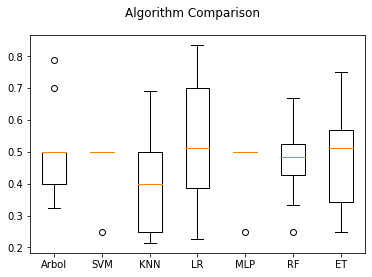

In [15]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.453571 (0.236215)
SVM: 0.000000 (0.000000)
KNN: 0.225000 (0.197379)
LR: 0.401667 (0.299856)
MLP: 0.000000 (0.000000)
RF: 0.365833 (0.355794)
ET: 0.333333 (0.387298)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.785632, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 5.320386, p:0.000171
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

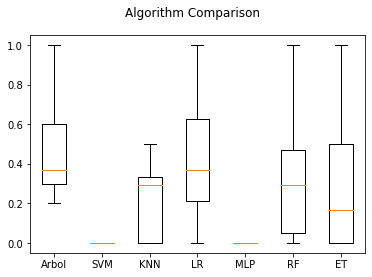

In [16]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.498333 (0.214793)
SVM: 0.000000 (0.000000)
KNN: 0.225000 (0.244523)
LR: 0.425000 (0.330088)
MLP: 0.000000 (0.000000)
RF: 0.275000 (0.226844)
ET: 0.191667 (0.204294)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.800777, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.491352, p:0.000758
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

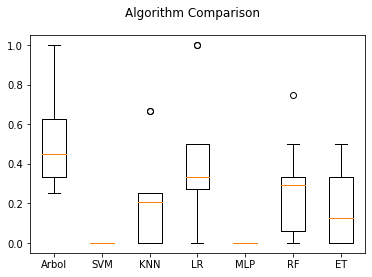

In [17]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.481111 (0.120498)
SVM: 0.530000 (0.154444)
KNN: 0.398889 (0.139527)
LR: 0.506667 (0.172362)
MLP: 0.530000 (0.154444)
RF: 0.466667 (0.174696)
ET: 0.497778 (0.184645)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.939046, p:0.002018
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.624044, p:0.710337
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

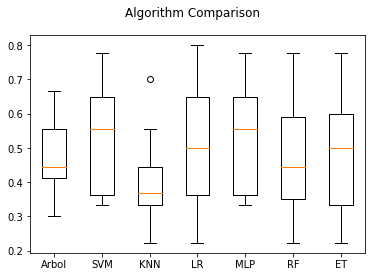

In [18]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 2 components

In [15]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)

In [21]:
pca.fit(X)

PCA(n_components=2)

In [22]:
X_pca2 = pca.transform(X)

In [23]:
X_pca2.shape

(92, 2)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.445238 (0.158811)
SVM: 0.492857 (0.021429)
KNN: 0.476905 (0.102894)
LR: 0.550595 (0.127782)
MLP: 0.478571 (0.133526)
RF: 0.361190 (0.174174)
ET: 0.500000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.871977, p:0.000004
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.884690, p:0.002313
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

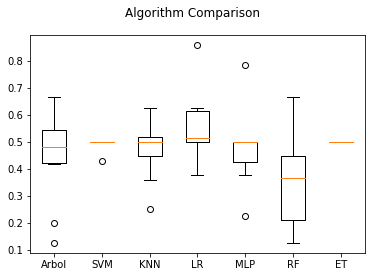

In [24]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.325000 (0.242813)
SVM: 0.000000 (0.000000)
KNN: 0.283333 (0.394757)
LR: 0.383333 (0.373050)
MLP: 0.093333 (0.149666)
RF: 0.189524 (0.245982)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.673288, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.648972, p:0.003588
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

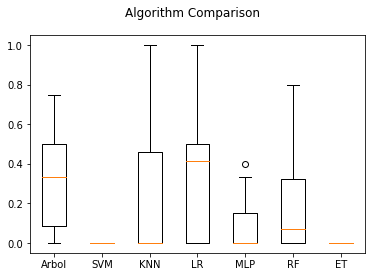

In [25]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.308333 (0.252900)
SVM: 0.000000 (0.000000)
KNN: 0.100000 (0.128019)
LR: 0.233333 (0.288194)
MLP: 0.191667 (0.337577)
RF: 0.241667 (0.269902)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.668919, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.142949, p:0.009271
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

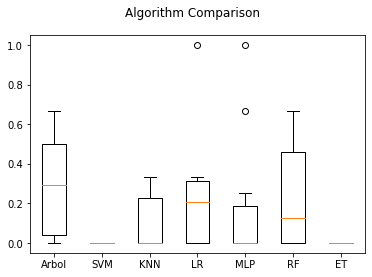

In [26]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.465556 (0.178640)
SVM: 0.552222 (0.130720)
KNN: 0.518889 (0.139492)
LR: 0.563333 (0.160251)
MLP: 0.474444 (0.163000)
RF: 0.358889 (0.189740)
ET: 0.563333 (0.144021)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.918225, p:0.000220
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.432613, p:0.854424
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

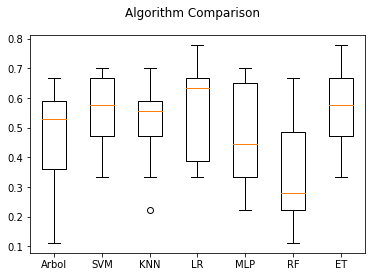

In [27]:
compare_methods(X_pca2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# PCA with 10 components

In [16]:
pca = PCA(n_components=10)

In [17]:
pca.fit(X)

PCA(n_components=10)

In [18]:
X_pca10 = pca.transform(X)

In [19]:
!mv temp.csv temppca2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.307738 (0.157349)
SVM: 0.491667 (0.025000)
KNN: 0.447262 (0.142241)
LR: 0.534643 (0.250771)
MLP: 0.524524 (0.098461)
RF: 0.485000 (0.110336)
ET: 0.501190 (0.040001)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947618, p:0.005451
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 5.892806, p:0.000063
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

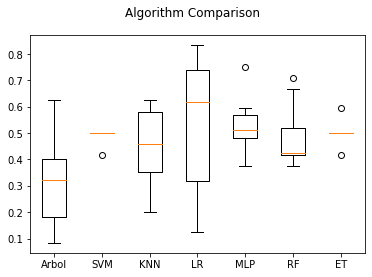

In [20]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.235000 (0.195995)
SVM: 0.025000 (0.075000)
KNN: 0.325000 (0.388104)
LR: 0.510000 (0.366379)
MLP: 0.425000 (0.296859)
RF: 0.343333 (0.220630)
ET: 0.050000 (0.150000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.807779, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.629821, p:0.003718
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

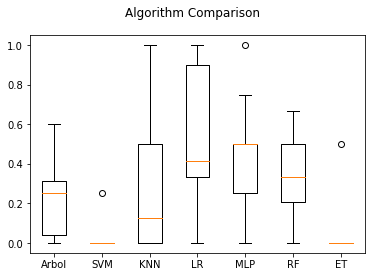

In [21]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.295000 (0.260134)
SVM: 0.033333 (0.100000)
KNN: 0.145000 (0.167672)
LR: 0.416667 (0.311805)
MLP: 0.261667 (0.162797)
RF: 0.325000 (0.239936)
ET: 0.033333 (0.100000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.822365, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.609389, p:0.000612
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

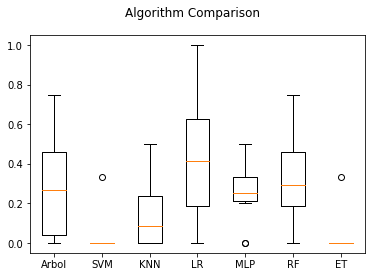

In [22]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.312222 (0.146940)
SVM: 0.541111 (0.143505)
KNN: 0.475556 (0.174823)
LR: 0.530000 (0.246759)
MLP: 0.576667 (0.118055)
RF: 0.485556 (0.130909)
ET: 0.553333 (0.144598)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.962474, p:0.034340
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.084679, p:0.381324
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

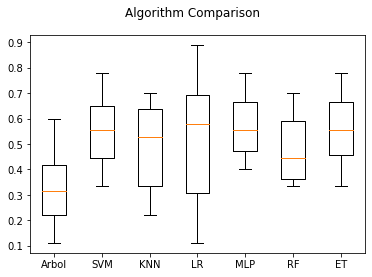

In [23]:
compare_methods(X_pca10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [24]:
!mv temp.csv temppca10.csv

# PCA with 50 components

In [27]:
pca = PCA(n_components=50)

In [28]:
pca.fit(X)

PCA(n_components=50)

In [29]:
X_pca100 = pca.transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.528095 (0.152171)
SVM: 0.524167 (0.123516)
KNN: 0.402143 (0.177932)
LR: 0.550833 (0.181559)
MLP: 0.514881 (0.125661)
RF: 0.510952 (0.102696)
ET: 0.557024 (0.090367)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.962026, p:0.032425
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.549074, p:0.177047
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

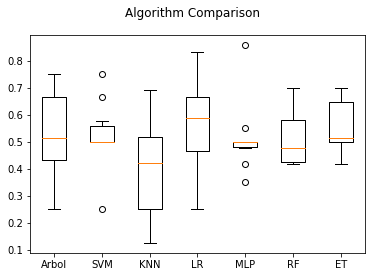

In [30]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.515238 (0.323477)
SVM: 0.200000 (0.331662)
KNN: 0.233333 (0.213437)
LR: 0.441667 (0.293565)
MLP: 0.283333 (0.247768)
RF: 0.391667 (0.361421)
ET: 0.350000 (0.390512)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.854501, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.631560, p:0.704420
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

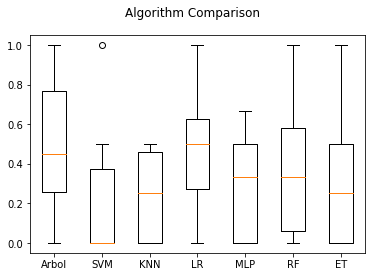

In [31]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.415000 (0.190095)
SVM: 0.191667 (0.298259)
KNN: 0.241667 (0.262070)
LR: 0.541667 (0.375000)
MLP: 0.320000 (0.327346)
RF: 0.240000 (0.170978)
ET: 0.198333 (0.209821)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.870283, p:0.000003
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.543438, p:0.178792
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

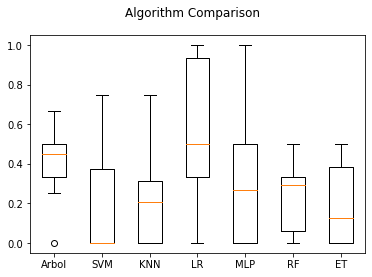

In [32]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.556667 (0.157954)
SVM: 0.550000 (0.173934)
KNN: 0.407778 (0.183118)
LR: 0.518889 (0.153160)
MLP: 0.518889 (0.139492)
RF: 0.533333 (0.127172)
ET: 0.585556 (0.149571)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.959095, p:0.022321
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.544662, p:0.772226
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

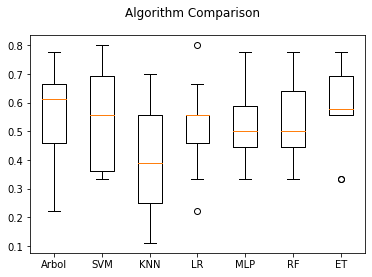

In [33]:
compare_methods(X_pca100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [34]:
!mv temp.csv temppca100.csv

# TSNE with 2 components

In [35]:
from sklearn.manifold import TSNE

In [36]:
Xtsne2 = TSNE(n_components=2).fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.481190 (0.176128)
SVM: 0.451786 (0.099944)
KNN: 0.502619 (0.114356)
LR: 0.532976 (0.123686)
MLP: 0.497143 (0.093517)
RF: 0.580357 (0.131072)
ET: 0.456667 (0.122715)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.920024, p:0.000264
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.000000, p:0.433357
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

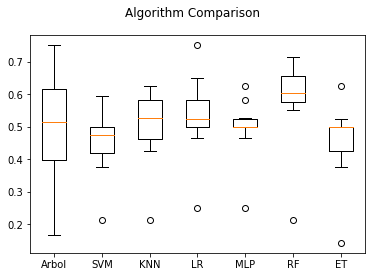

In [37]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.485000 (0.328164)
SVM: 0.206667 (0.213333)
KNN: 0.433333 (0.351188)
LR: 0.503333 (0.377256)
MLP: 0.336667 (0.371319)
RF: 0.689524 (0.318385)
ET: 0.166667 (0.307318)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.849639, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.622169, p:0.711813
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

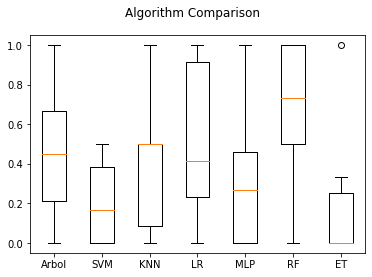

In [38]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.348333 (0.202957)
SVM: 0.166667 (0.178730)
KNN: 0.223333 (0.169181)
LR: 0.275000 (0.182764)
MLP: 0.183333 (0.169967)
RF: 0.390000 (0.266166)
ET: 0.091667 (0.141667)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.883443, p:0.000009
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.557779, p:0.762122
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

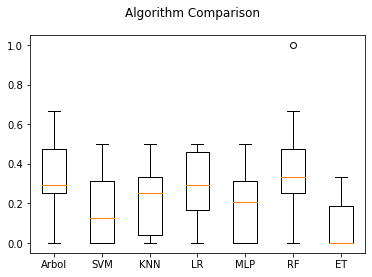

In [39]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.475556 (0.207144)
SVM: 0.463333 (0.126496)
KNN: 0.528889 (0.139682)
LR: 0.540000 (0.152364)
MLP: 0.507778 (0.140550)
RF: 0.596667 (0.124132)
ET: 0.475556 (0.153703)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947167, p:0.005167
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.811220, p:0.565163
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

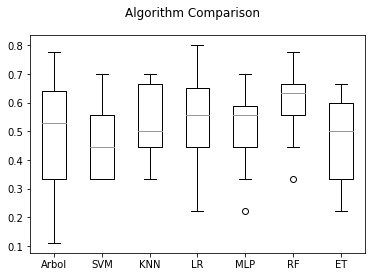

In [40]:
compare_methods(Xtsne2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [41]:
!mv temp.csv temptsne2.csv

# TSNE with 3 components

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.468333 (0.164595)
SVM: 0.500000 (0.000000)
KNN: 0.420595 (0.146331)
LR: 0.446786 (0.083439)
MLP: 0.456786 (0.126029)
RF: 0.427024 (0.117691)
ET: 0.500000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.904939, p:0.000061
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 5.300189, p:0.000178
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

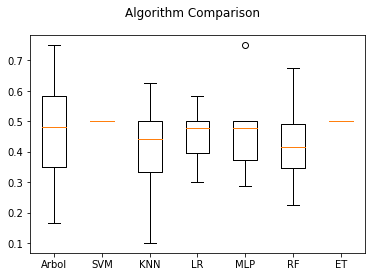

In [42]:
Xtsne3 = TSNE(n_components=3).fit_transform(X)
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.458333 (0.305437)
SVM: 0.000000 (0.000000)
KNN: 0.253333 (0.388501)
LR: 0.150000 (0.302306)
MLP: 0.250000 (0.309570)
RF: 0.305000 (0.244501)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.691518, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.062117, p:0.070345
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

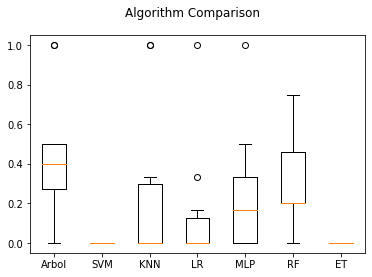

In [43]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.320000 (0.149778)
SVM: 0.000000 (0.000000)
KNN: 0.128333 (0.172892)
LR: 0.091667 (0.160078)
MLP: 0.158333 (0.176580)
RF: 0.310000 (0.189033)
ET: 0.000000 (0.000000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.740048, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.912402, p:0.014316
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

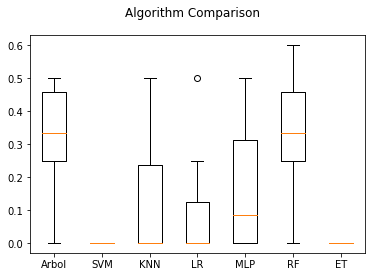

In [44]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.490000 (0.143712)
SVM: 0.563333 (0.144021)
KNN: 0.443333 (0.190675)
LR: 0.464444 (0.122807)
MLP: 0.488889 (0.098758)
RF: 0.424444 (0.136065)
ET: 0.563333 (0.144021)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.960110, p:0.025387
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.945232, p:0.469470
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

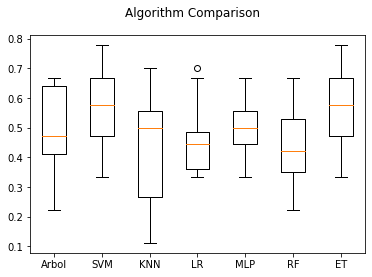

In [45]:
compare_methods(Xtsne3,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [46]:
!mv temp.csv temptsne3.csv

# UMAP with 2 components

In [47]:
from umap import UMAP

In [48]:
reducer = UMAP()

In [49]:
Xumap = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.427500 (0.123947)
SVM: 0.449286 (0.111504)
KNN: 0.483571 (0.066379)
LR: 0.451905 (0.118597)
MLP: 0.483333 (0.050000)
RF: 0.444643 (0.136567)
ET: 0.481071 (0.073687)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.890408, p:0.000017
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.255811, p:0.049132
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

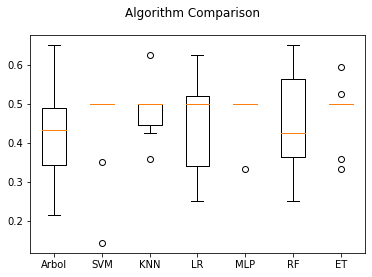

In [50]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.300000 (0.234639)
SVM: 0.033333 (0.100000)
KNN: 0.233333 (0.334996)
LR: 0.200000 (0.331662)
MLP: 0.000000 (0.000000)
RF: 0.326667 (0.202649)
ET: 0.166667 (0.210819)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.720786, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.621246, p:0.156026
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

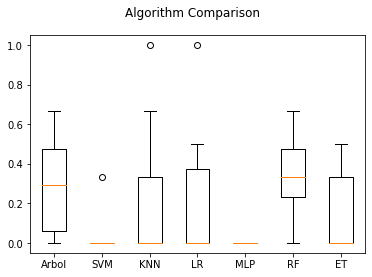

In [51]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.298333 (0.223414)
SVM: 0.050000 (0.150000)
KNN: 0.116667 (0.145297)
LR: 0.083333 (0.129099)
MLP: 0.000000 (0.000000)
RF: 0.365000 (0.263781)
ET: 0.158333 (0.218740)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.720330, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.832190, p:0.016653
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

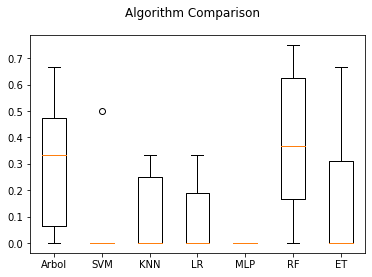

In [52]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.445556 (0.123773)
SVM: 0.485556 (0.164358)
KNN: 0.531111 (0.104444)
LR: 0.496667 (0.172280)
MLP: 0.552222 (0.164208)
RF: 0.455556 (0.140633)
ET: 0.496667 (0.131661)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.930816, p:0.000814
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.683887, p:0.663218
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

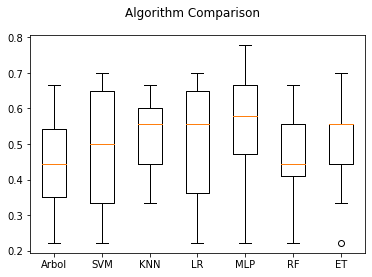

In [53]:
compare_methods(Xumap,Y,listAlgorithms,listParams,listNames,metric='accuracy')

In [54]:
!mv temp.csv tempumap2.csv

# UMAP with 10 components

In [55]:
reducer = UMAP(n_components=10)

In [56]:
Xumap10 = reducer.fit_transform(X)

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.546667 (0.131097)
SVM: 0.459286 (0.106524)
KNN: 0.463095 (0.107164)
LR: 0.460357 (0.143811)
MLP: 0.508333 (0.025000)
RF: 0.469167 (0.102372)
ET: 0.437143 (0.109637)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.888866, p:0.000014
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.445219, p:0.211783
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

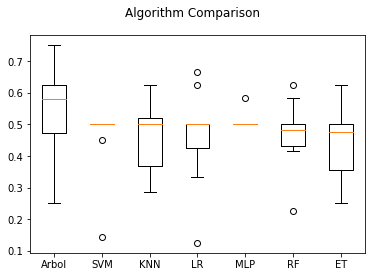

In [57]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.466667 (0.335659)
SVM: 0.073333 (0.147422)
KNN: 0.233333 (0.326599)
LR: 0.266667 (0.388730)
MLP: 0.040000 (0.120000)
RF: 0.435000 (0.240538)
ET: 0.191667 (0.302880)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.747874, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.100566, p:0.372091
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

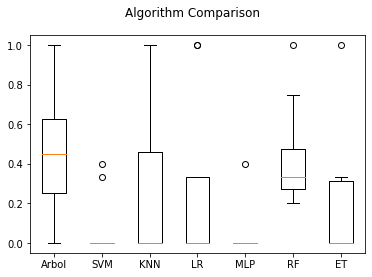

In [58]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.430000 (0.268618)
SVM: 0.116667 (0.236291)
KNN: 0.103333 (0.130128)
LR: 0.116667 (0.145297)
MLP: 0.066667 (0.200000)
RF: 0.336667 (0.119443)
ET: 0.116667 (0.145297)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.785105, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.679840, p:0.666398
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

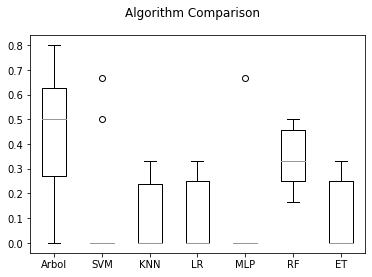

In [59]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.541111 (0.134628)
SVM: 0.474444 (0.147074)
KNN: 0.506667 (0.158869)
LR: 0.506667 (0.211006)
MLP: 0.552222 (0.139846)
RF: 0.477778 (0.119670)
ET: 0.464444 (0.157981)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.947297, p:0.005247
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.635921, p:0.700984
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

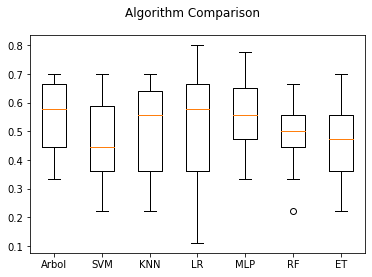

In [60]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# Isomap

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.465833 (0.152208)
SVM: 0.456786 (0.109317)
KNN: 0.468214 (0.057951)
LR: 0.467500 (0.064058)
MLP: 0.502500 (0.085314)
RF: 0.329048 (0.149796)
ET: 0.492857 (0.060281)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.819247, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.816861, p:0.110058
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

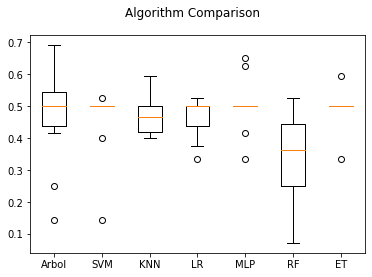

In [61]:
from sklearn import manifold
clf = manifold.Isomap(10, n_components=2)
X_iso2 = clf.fit_transform(X)
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='auroc')
!mv temp.csv tempiso2.csv

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.395238 (0.227926)
SVM: 0.083333 (0.170783)
KNN: 0.158333 (0.205649)
LR: 0.125000 (0.201556)
MLP: 0.166667 (0.341565)
RF: 0.283333 (0.208167)
ET: 0.050000 (0.150000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.728770, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.480395, p:0.820475
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

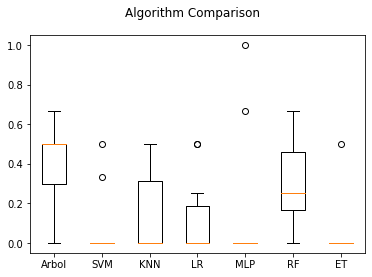

In [62]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.425000 (0.253996)
SVM: 0.058333 (0.118145)
KNN: 0.108333 (0.139692)
LR: 0.083333 (0.129099)
MLP: 0.075000 (0.160078)
RF: 0.220000 (0.123783)
ET: 0.033333 (0.100000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.724877, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.645477, p:0.149496
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

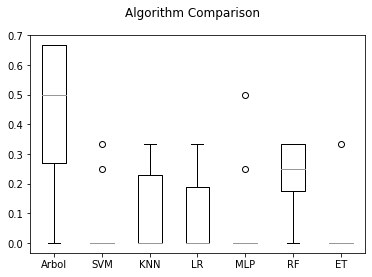

In [63]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.463333 (0.152999)
SVM: 0.485556 (0.148578)
KNN: 0.507778 (0.131473)
LR: 0.518889 (0.171273)
MLP: 0.563333 (0.167778)
RF: 0.323333 (0.147108)
ET: 0.541111 (0.143505)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.952730, p:0.010102
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.115770, p:0.994217
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

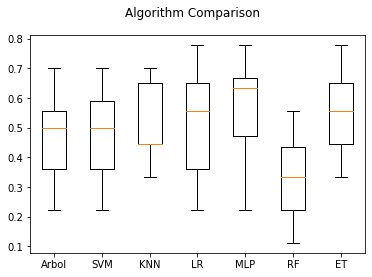

In [64]:
compare_methods(X_iso2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.424405 (0.156257)
SVM: 0.455952 (0.107282)
KNN: 0.466905 (0.082559)
LR: 0.411667 (0.153956)
MLP: 0.500000 (0.000000)
RF: 0.457857 (0.140510)
ET: 0.460952 (0.105324)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.893692, p:0.000022
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.358824, p:0.006177
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

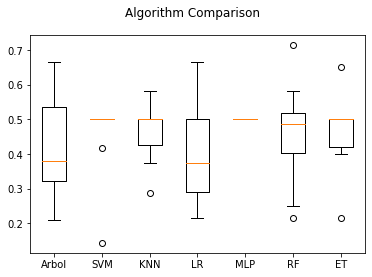

In [65]:
clf = manifold.Isomap(10, n_components=10)
X_iso10 = clf.fit_transform(X)
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.335952 (0.213396)
SVM: 0.000000 (0.000000)
KNN: 0.133333 (0.208167)
LR: 0.141667 (0.235850)
MLP: 0.000000 (0.000000)
RF: 0.273333 (0.189033)
ET: 0.125000 (0.214897)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.699309, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.604217, p:0.160770
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

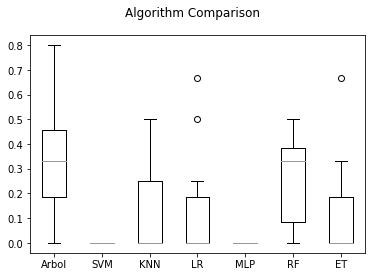

In [66]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.391667 (0.214249)
SVM: 0.000000 (0.000000)
KNN: 0.091667 (0.141667)
LR: 0.150000 (0.240947)
MLP: 0.000000 (0.000000)
RF: 0.311667 (0.310560)
ET: 0.116667 (0.183333)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.689506, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.771736, p:0.018663
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

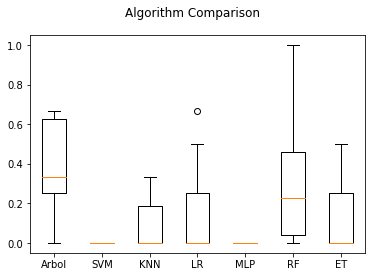

In [67]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.414444 (0.169826)
SVM: 0.496667 (0.149241)
KNN: 0.496667 (0.131661)
LR: 0.413333 (0.138493)
MLP: 0.563333 (0.144021)
RF: 0.436667 (0.115475)
ET: 0.475556 (0.117252)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.938679, p:0.001936
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.486401, p:0.816075
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

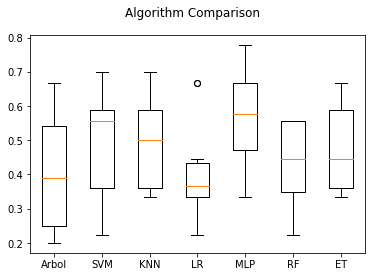

In [68]:
compare_methods(X_iso10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# LLE

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.478929 (0.137111)
SVM: 0.500000 (0.000000)
KNN: 0.510357 (0.126574)
LR: 0.470833 (0.059073)
MLP: 0.475000 (0.093541)
RF: 0.470595 (0.112377)
ET: 0.542381 (0.111344)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.906394, p:0.000070
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.175474, p:0.008720
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

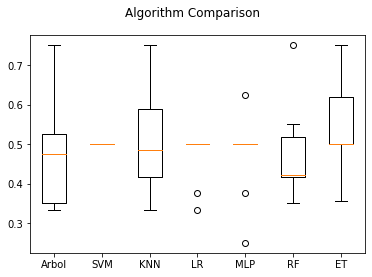

In [69]:
clf = manifold.LocallyLinearEmbedding(10, n_components=2,method='standard')
X_lle2 = clf.fit_transform(X)
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.346667 (0.228133)
SVM: 0.000000 (0.000000)
KNN: 0.425000 (0.419076)
LR: 0.033333 (0.100000)
MLP: 0.100000 (0.300000)
RF: 0.376667 (0.157092)
ET: 0.466667 (0.452155)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.731838, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 6.702412, p:0.000016
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

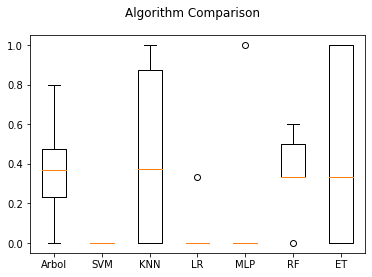

In [70]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.378333 (0.289449)
SVM: 0.000000 (0.000000)
KNN: 0.211667 (0.194086)
LR: 0.033333 (0.100000)
MLP: 0.025000 (0.075000)
RF: 0.378333 (0.259063)
ET: 0.186667 (0.169935)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.742712, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 4.977978, p:0.000315
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

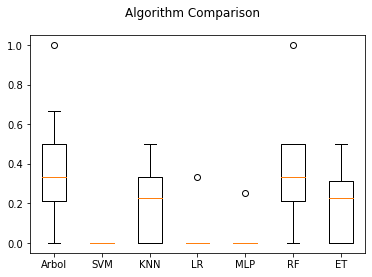

In [71]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.487778 (0.143540)
SVM: 0.563333 (0.144021)
KNN: 0.551111 (0.149005)
LR: 0.530000 (0.169680)
MLP: 0.528889 (0.171428)
RF: 0.488889 (0.108412)
ET: 0.583333 (0.126222)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.936337, p:0.001489
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.445480, p:0.845483
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

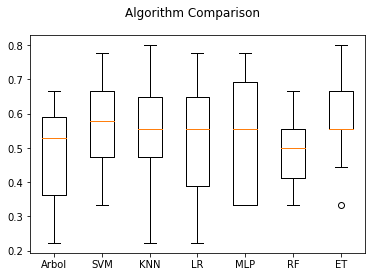

In [72]:
compare_methods(X_lle2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.533095 (0.188284)
SVM: 0.500000 (0.000000)
KNN: 0.525000 (0.053359)
LR: 0.500000 (0.000000)
MLP: 0.500000 (0.000000)
RF: 0.470119 (0.150554)
ET: 0.420238 (0.132170)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.798717, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 7.503961, p:0.000004
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

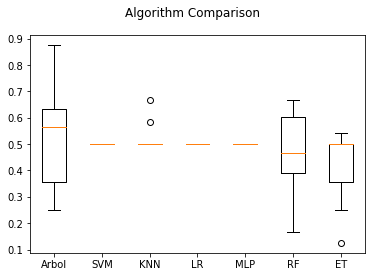

In [73]:
clf = manifold.LocallyLinearEmbedding(10, n_components=10,method='standard')
X_lle10 = clf.fit_transform(X)
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.563810 (0.253190)
SVM: 0.000000 (0.000000)
KNN: 0.150000 (0.320156)
LR: 0.000000 (0.000000)
MLP: 0.000000 (0.000000)
RF: 0.462619 (0.303584)
ET: 0.100000 (0.169967)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.661942, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.702956, p:0.003244
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

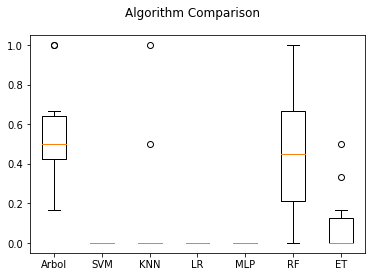

In [74]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.551667 (0.135902)
SVM: 0.000000 (0.000000)
KNN: 0.066667 (0.133333)
LR: 0.000000 (0.000000)
MLP: 0.000000 (0.000000)
RF: 0.340000 (0.163673)
ET: 0.091667 (0.141667)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.685616, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.132561, p:0.009454
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

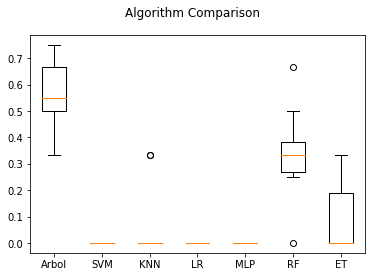

In [75]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.554444 (0.206107)
SVM: 0.563333 (0.144021)
KNN: 0.574444 (0.155401)
LR: 0.563333 (0.144021)
MLP: 0.563333 (0.144021)
RF: 0.500000 (0.177847)
ET: 0.442222 (0.175387)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.957597, p:0.018478
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.398956, p:0.876987
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

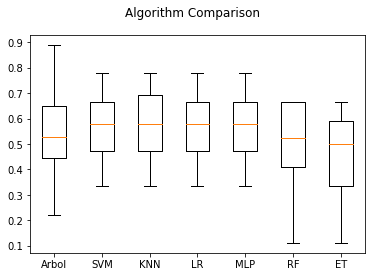

In [76]:
compare_methods(X_lle10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.625833 (0.149253)
SVM: 0.500000 (0.000000)
KNN: 0.535476 (0.097890)
LR: 0.492857 (0.021429)
MLP: 0.500000 (0.037268)
RF: 0.417976 (0.161952)
ET: 0.469048 (0.053293)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.850221, p:0.000001
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 9.129724, p:0.000000
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

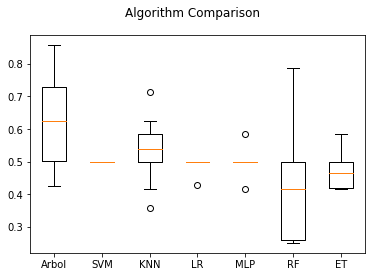

In [78]:
clf = manifold.LocallyLinearEmbedding(10, n_components=50,method='standard')
X_lle100 = clf.fit_transform(X)
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.609048 (0.278467)
SVM: 0.040000 (0.120000)
KNN: 0.300000 (0.339935)
LR: 0.000000 (0.000000)
MLP: 0.100000 (0.300000)
RF: 0.255000 (0.192650)
ET: 0.133333 (0.305505)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.685649, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 2.569715, p:0.027299
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

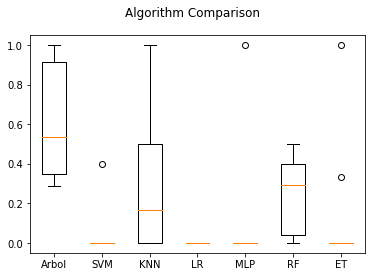

In [79]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.556667 (0.272356)
SVM: 0.100000 (0.300000)
KNN: 0.248333 (0.310953)
LR: 0.000000 (0.000000)
MLP: 0.016667 (0.050000)
RF: 0.275000 (0.288795)
ET: 0.066667 (0.152753)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.662718, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.137486, p:0.009367
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

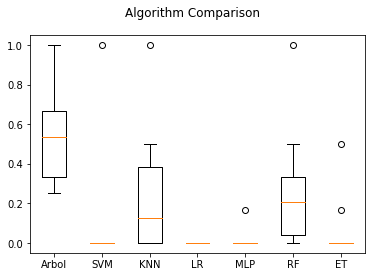

In [80]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.598889 (0.141111)
SVM: 0.543333 (0.151246)
KNN: 0.532222 (0.110939)
LR: 0.553333 (0.137509)
MLP: 0.564444 (0.130885)
RF: 0.412222 (0.151409)
ET: 0.511111 (0.096353)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.953336, p:0.010882
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.754294, p:0.608390
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

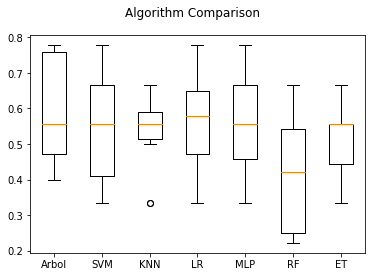

In [81]:
compare_methods(X_lle100,Y,listAlgorithms,listParams,listNames,metric='accuracy')

# MDS

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.476071 (0.091299)
SVM: 0.501429 (0.019378)
KNN: 0.463929 (0.154721)
LR: 0.493452 (0.080182)
MLP: 0.463929 (0.155693)
RF: 0.512738 (0.148826)
ET: 0.473690 (0.035629)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943587, p:0.003395
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 3.678490, p:0.003395
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

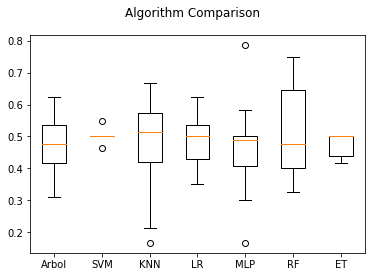

In [82]:
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds2 = clf.fit_transform(X)
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.485000 (0.238799)
SVM: 0.070000 (0.155242)
KNN: 0.433333 (0.351188)
LR: 0.378333 (0.279687)
MLP: 0.170000 (0.210000)
RF: 0.400000 (0.288194)
ET: 0.100000 (0.200000)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.826786, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.272932, p:0.282629
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

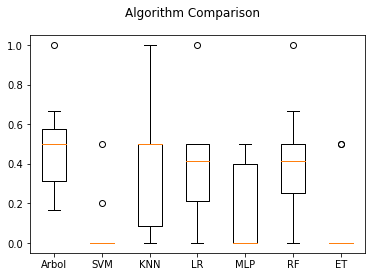

In [83]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.348333 (0.088647)
SVM: 0.100000 (0.200000)
KNN: 0.178333 (0.126282)
LR: 0.228333 (0.143575)
MLP: 0.220000 (0.333400)
RF: 0.448333 (0.336027)
ET: 0.036667 (0.073711)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.812243, p:0.000000
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.914622, p:0.092177
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

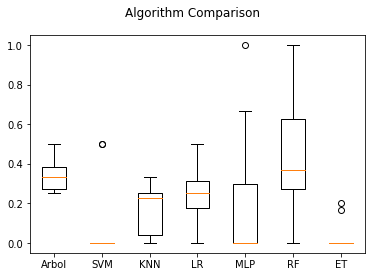

In [84]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.490000 (0.121559)
SVM: 0.530000 (0.128241)
KNN: 0.506667 (0.192655)
LR: 0.507778 (0.140550)
MLP: 0.486667 (0.146885)
RF: 0.478889 (0.109370)
ET: 0.542222 (0.132292)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.944968, p:0.003987
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.685839, p:0.661685
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

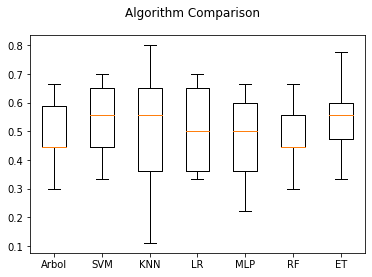

In [85]:
compare_methods(X_mds2,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.542976 (0.165509)
SVM: 0.487500 (0.087500)
KNN: 0.457857 (0.108010)
LR: 0.504405 (0.161473)
MLP: 0.500238 (0.097169)
RF: 0.559762 (0.189733)
ET: 0.479762 (0.118337)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.943298, p:0.003282
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.235819, p:0.300256
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

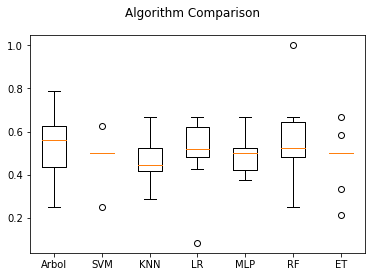

In [86]:
clf = manifold.MDS(n_components=10, n_init=1, max_iter=100)
X_mds10 = clf.fit_transform(X)
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='auroc')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.448333 (0.199785)
SVM: 0.173333 (0.311555)
KNN: 0.366667 (0.208167)
LR: 0.500000 (0.220479)
MLP: 0.270833 (0.240983)
RF: 0.570000 (0.255365)
ET: 0.150000 (0.320156)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.883124, p:0.000009
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.172883, p:0.983188
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

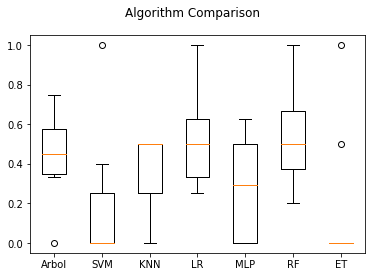

In [87]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='precision')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.506667 (0.283059)
SVM: 0.091667 (0.160078)
KNN: 0.228333 (0.178115)
LR: 0.353333 (0.149034)
MLP: 0.300000 (0.303223)
RF: 0.428333 (0.239450)
ET: 0.066667 (0.133333)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.886311, p:0.000012
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.804909, p:0.112456
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

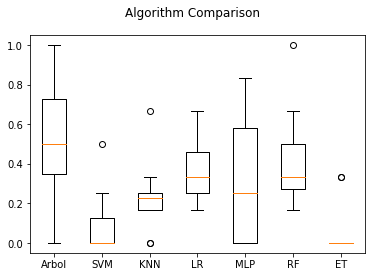

In [88]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='recall')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.542222 (0.141317)
SVM: 0.553333 (0.168274)
KNN: 0.478889 (0.120129)
LR: 0.528889 (0.177166)
MLP: 0.533333 (0.115042)
RF: 0.565556 (0.200521)
ET: 0.523333 (0.184622)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.967754, p:0.068015
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 0.506480, p:0.801185
The null hypothesis (heteroscedasticity) is accepted
Conditions for a parametric test are not fulfill

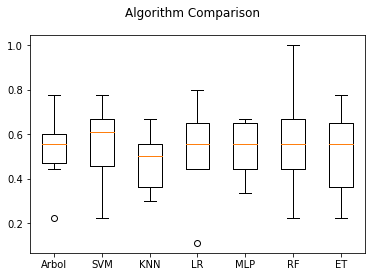

In [89]:
compare_methods(X_mds10,Y,listAlgorithms,listParams,listNames,metric='accuracy')

temp.csv
['Arbol' 'SVM' 'KNN' 'LR' 'MLP' 'RF' 'ET']
Report
**********************************************************
Mean and std
**********************************************************
Arbol: 0.419762 (0.130941)
SVM: 0.514881 (0.070097)
KNN: 0.447976 (0.097937)
LR: 0.519881 (0.094797)
MLP: 0.422024 (0.122271)
RF: 0.479286 (0.105053)
ET: 0.532738 (0.050455)
**********************************************************
Statistical tests
**********************************************************
----------------------------------------------------------
Checking parametric conditions 
----------------------------------------------------------
Checking independence 
Ok
Checking normality using Shapiro-Wilk's test for normality, alpha=0.05
W: 0.951330, p:0.008517
The null hypothesis (normality) is rejected
Checking heteroscedasticity using Levene's test, alpha=0.05
W: 1.043884, p:0.405803
The null hypothesis (heteroscedasticity) is rejected
Conditions for a parametric test are not fulfill

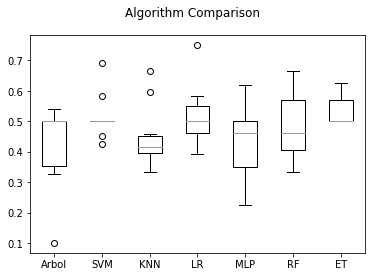

In [90]:
clf = manifold.MDS(n_components=50, n_init=1, max_iter=100)
X_mds100 = clf.fit_transform(X)
compare_methods(X_mds100,Y,listAlgorithms,listParams,listNames,metric='auroc')

In [91]:
compare_methods(XumaX_mds10p10,Y,listAlgorithms,listParams,listNames,metric='precision')

NameError: name 'XumaX_mds10p10' is not defined

In [ ]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='recall')

In [ ]:
compare_methods(Xumap10,Y,listAlgorithms,listParams,listNames,metric='accuracy')